# <center> Introdução ao Pandas - Parte 1 </center>
___

<p align="center">
  <img src="https://nsee.maua.br/wp-content/uploads/2023/05/logo_nsee_white.svg",width=200, height=120/>
</p>

___

## Neste Notebook
1. [Numpy](#numpy)
    1. [O que é o Numpy](#oqeh)
    2. [Importando o numPy](#import)
    3. [Selecionando subconjuntos de NumPy Arrays](#subconjuntos)
    4. [Exercício 1.1](#ex1)
    5. [Array N-dimensional](#ndim)
    6. [Selecionando subconjuntos de array bi-dimensional](#subndim)
    7. [Exercício 1.2](#ex2)
    8. [Estatística básica com NumPy](#estat)
    9. [Exercício 1.3](#ex3)
2. [Correção](#correcao)

___

# <center> Objetivos de aprendizado </center>
- Familiarizar-se com as funcionalidades básicas do NumPy
- Entendendo a importância do NumPy para o Pandas

Bons estudos!
___


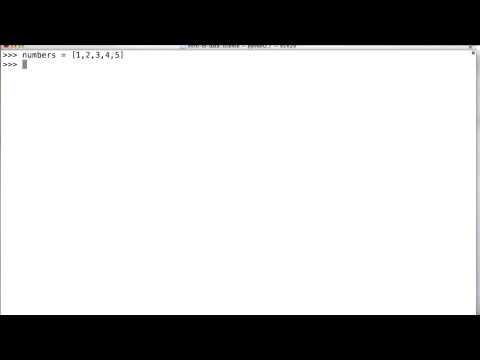

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('l_Tzjxfa_5g', width=800, height=450)

<a name="numpy"></a>
# 1. NumPy

<a name="oqeh"></a>
## 1.1 O que é o NumPy?

[NumPy](#https://numpy.org/doc/stable/user/index.html#user) é a abreviação de *Numerical Python* ou *Numeric Python*. Ela é uma biblioteca *open-source* (ou seja, é um software cujo código original é disponibilizado livremente e pode ser distribuído e modificado) que oferece suporte a arrays e matrizes multidimensionais, provendo diversas funções matemáticas úteis para nós na área de machine learning.

As listas do Python funcionam como as arrays, no entanto, são lentas para utilização com grandes volumes de dados. No ramo de Ciência de Dados, existe uma grande área dedicada às estruturas de dados, e como fazer elas serem mais eficiêntes possíveis. Dessa forma, o NumPy nos possibilita utilizar os objetos arrays, que são bem mais rápidos que as listas tradicionais do Python.

O **ndarray** é o objeto fundamental do NumPy. Este objeto é uma matriz N-dimensional, vamos entender melhor como este objeto funciona nas células abaixo.

<a name="import"></a>
## 1.2. Importando o NumPy

Na aula anterior você já aprendeu a importar o NumPy, vamos importá-lo com o apelido ```np```.

In [ ]:
import numpy as np

Vamos agora observar o porquê o NumPy é tão poderoso e preferível às listas do Python.

Imagine que você tenha duas listas de dados de indivíduos, com alturas e pesos, e queira calcular o IMC [(Índice de Massa Corporal)](https://pt.wikipedia.org/wiki/Índice_de_massa_corporal) de cada um deles, como mostrado abaixo:

In [ ]:
alturas = [1.81, 1.77, 1.69, 1.91]
pesos = [89.0, 77.3, 55.9, 99.4]

# Calculando o IMC
imc = pesos / alturas ** 2

Observe que o Python nos retornou um erro porque não é possivel realizar cálculos com listas, para isso vamos utilizar os arrays do NumPy!

Para realizarmos esse cálculo, seria preciso iterar sobre as listas

In [ ]:
imc = list()
for altura, peso in zip(alturas, pesos):
    imc.append(peso / altura ** 2)
imc

Podemos fazer isso com Numpy da seguinte maneira

In [ ]:
# Criando os arrays com o NumPy

np_altura = np.array(alturas)
np_peso = np.array(pesos)

# Calculando o IMC
imc = np_peso / np_altura ** 2
imc

Agora imagine um cenário em que você tenha 1000000 indivíduos, e queira calcular o IMC de cada um deles. Para isso, você teria que iterar sobre as listas, o que seria muito lento e ineficiente.

In [ ]:
from random import uniform
from time import time

altura_usando_lista = [round(uniform(1.5,1.99), 2) for i in range(1000000)]
peso_usando_lista = [round(uniform(50,120), 2) for i in range(1000000)]
altura_usando_numpy = np.array(altura_usando_lista)
peso_usando_numpy = np.array(peso_usando_lista)

# Medindo o tempo usando listas do python
t0_lista = time()
imc_lista = [peso / altura ** 2 for altura, peso in zip(altura_usando_lista, peso_usando_lista)]
tf_lista = time()

# Medindo o tempo usando arrays do numpy
t0_numpy = time()
imc_numpy = peso_usando_numpy / altura_usando_numpy ** 2
tf_numpy = time()

print(f'Tempo usando lista: {(tf_lista - t0_lista)*1000} milisegundos')
print(f'Tempo usando numpy: {(tf_numpy - t0_numpy)*1000} milisegundos')


Não só fazer operações matemáticas, mas se usarmos o método ```sort```, que ordena o vetor, podemos ver que o NumPy é muito mais rápido que o Python.

In [ ]:
# Medindo o tempo usando listas do python
t0_lista = time()
imc_lista.sort()
tf_lista = time()

# Medindo o tempo usando arrays do numpy
t0_numpy = time()
imc_numpy.sort()
tf_numpy = time()

print(f'Tempo usando lista: {(tf_lista - t0_lista)*1000} milisegundos')
print(f'Tempo usando numpy: {(tf_numpy - t0_numpy)*1000} milisegundos')

É possível ver o quão mais rápido é manipular arrays do que listas com o NumPy. Além disso, o código fica mais limpo e legível.

Além disso o Numpy consegue realizar perfeitamente as operações elemento a elemento!

Mas fique atento! O NumPy só consegue fazer isto, pois ele assume que cada array possui elementos de um único tipo de dado. Se você tentar criar um array com tipos de dados diferentes, o NumPy irá converter todos os elementos para um único tipo. Observe abaixo:


In [ ]:
np.array([1.0, 4, True, "NumPy"])


Além disso, algumas operações podem funcionar de forma diferente do que você imagina. Veja o exemplo abaixo:

In [ ]:
# Lista do Python
alturas * 2

Quando multiplicamos uma lista por ```n```, o Python irá concatenar a lista ```n``` vezes, como ele faria com uma string.

In [ ]:
# NumPy array
np_altura * 2

Porém quando fazemos a mesma operação com um array do Numpy, ele faz o que esperamos, e multiplica todos os valores dentro do array por ```n```.

<a name="subconjuntos"></a>
## 1.3. Selecionando subconjuntos de NumPy Arrays
A seleção de subconjuntos de NumPy arrays funciona de forma similar à listas de Python.

In [ ]:
# retornando o terceiro elemento da array
imc[2]

Você também pode selecionar subconjuntos baseados em condições, de forma que apenas os valores que satisfazem as condições serão retornados.

In [ ]:
imc[imc > 25]

Podemos combinar a seleção de um subconjunto com a utilização de uma função, observe:

In [ ]:
# soma do IMC do primeiro e segundo elementos
np.sum(imc[0:2])

Agora vamos fazer um exercício para fixação.

<a name="ex1"></a>
## Exercício 1.1

In [ ]:
#Exercício 1.1.1
# lista de pesos de castanhas
c_peso = [0.946, 0.918, 0.906, 0.904, 0.858, 0.774, 0.652, 0.516, 0.478, 0.404, 0.396, 0.364, 0.342, 0.304,
            0.262, 0.208, 0.134, 0.974, 0.792, 0.792, 0.628, 0.552, 0.506, 0.478, 0.462, 0.436, 0.408, 0.378,
            0.3, 0.298, 0.268, 0.252, 0.16, 0.114, 0.092, 0.936, 0.894, 0.744, 0.706, 0.694, 0.69, 0.652, 0.518,
            0.508, 0.502, 0.5, 0.47, 0.44, 0.39, 0.384]

# Crie um numpy array (np_c_peso) a partir de c_peso
np_c_peso = ____

# Printe o tipo de np_c_peso

In [ ]:
#Exercício 1.1.2
c_kg_preco = 45.00

# Crie um numpy array (np_c_despesa) a partir de np_c_peso com a quantia gasta em cada compra
np_c_despesa = ____

In [ ]:
#Exercício 1.1.3
# Crie a variável compras_acima_30 que corresponde ao valor total gasto nas compras que custaram mais de R$ 30. Printe o resultado
compras_acima_30 = ____

In [ ]:
# Exercício 1.1.4
# Salve na variável resposta_1_1 a soma de todas as compras abaixo de R$ 40 e acima de R$ 30
resposta_1_1 = ____

<a name="ndim"></a>
## 1.4.  Array N-dimensional
Vamos verificar o tipo dos arrays criados acima!

In [ ]:
print(type(np_c_peso))

**ndarrays** significam arrays N-dimensionais, vamos criar um NumPy array de duas dimensões a partir de listas tradicionais do Python.

In [ ]:
np_2d = np.array([[1.81, 1.77, 1.69, 1.91],
                  [89.0, 77.3, 55.9, 99.4]])
np_2d

Cada sublista da lista corresponde à uma linha da array bi-dimensional criada.
Podemos pensar em um array bi-dimensional como uma matriz.
<br>
Nós podemos verificar o tamanho do array usando o atributo ```shape```.

In [ ]:
np_2d.shape

Podemos ver que o np_2d tem 2 linhas e 4 colunas.

### 1.4.1. Produto escalar / Multiplicação matricial

Apredemos em Geometria Analítica que o produto escalar entre dois vetores é dado pela soma dos produtos dos elementos correspondentes de cada vetor. O mesmo é válido para vetores bi-dimensionais(matrizes), porém, neste caso, o produto escalar é chamado de multiplicação matricial.

Ele é dado facilmente pelo NumPy utilizando o método ```.dot()```.

In [ ]:
matriz_A = np.array([[1, 2],
                    [3, 4]])

matriz_B = np.array([[5, 6],
                    [7, 8]])

np.dot(matriz_A, matriz_B)

<a name="subndim"></a>
## 1.5. Selecionando subconjuntos de array bi-dimensional

Assim como o array unidimensional, também podemos selecionar um subconjunto de um array bi-dimensional, usando o índice da linha e coluna como exemplifica a imagem abaixo.

![Subsetting](https://imgur.com/08EIOjy.png)

Veja alguns exemplos de como isso é feito.

In [ ]:
# Selecionando a primeira linha (todos os pesos) inteira
np_2d[0]

In [ ]:
# Seleciona o peso da segunda entrada
np_2d[1][1]

In [ ]:
# Seleciona o peso da segunda entrada
np_2d[1][np_2d[1]>80]

Basicamente nós selecionamos a linha, e a partir daquela linha fazemos outra seleção.

Também é possível selecionar utilizando vírgulas dentro de colchetes: ```array[linha, coluna]```

In [ ]:
# Primeira linha e terceira colna
np_2d[0, 2]

In [ ]:
# Todas as linhas e segunda e terceira coluna
np_2d[:, 1:3]

<a name="ex2"></a>

## Exercício 1.2

Abaixo temos uma lista de listas contendo informações de vendas de castanhas de uma loja. Cada lista representa uma venda que foi realizada. O primeiro elemento de cada lista é o dia que  venda foi feita, o segundo elemento representa o peso das castanhas compradas. Por fim, o terceiro elemento é a quantia paga pelas castanhas.

Com isso em mente, faça os seguintes exercícios:

In [ ]:
castanha = [[2, 0.946, 66.1],
          [2, 0.918, 32.96],
          [2, 0.906, 58.76],
          [2, 0.904, 29.14],
          [2, 0.858, 59.96],
          [2, 0.774, 27.77],
          [2, 0.652, 42.3],
          [2, 0.516, 18.51],
          [2, 0.478, 17.15],
          [2, 0.404, 28.22],
          [2, 0.396, 7.88],
          [2, 0.364, 7.24],
          [2, 0.342, 22.18],
          [2, 0.304, 10.91],
          [2, 0.262, 9.41],
          [2, 0.208, 4.13],
          [2, 0.134, 9.36],
          [4, 0.974, 34.95],
          [4, 0.792, 51.38],
          [4, 0.792, 51.38],
          [4, 0.628, 12.48],
          [4, 0.552, 19.81],
          [4, 0.506, 25],
          [4, 0.478, 31],
          [4, 0.462, 32.24],
          [4, 0.436, 28.28],
          [4, 0.408, 14.64],
          [4, 0.378, 13.56],
          [4, 0.3, 19.46],
          [4, 0.298, 10.69],
          [4, 0.268, 9.62],
          [4, 0.252, 16.34],
          [4, 0.16, 3.18],
          [4, 0.114, 4.09],
          [4, 0.092, 5.97],
          [5, 0.936, 65.33],
          [5, 0.894, 32.07],
          [5, 0.744, 48.28],
          [5, 0.706, 25.34],
          [5, 0.694, 24.91],
          [5, 0.69, 13.72],
          [5, 0.652, 42.32],
          [5, 0.518, 33.6],
          [5, 0.508, 18.23],
          [5, 0.502, 35.09],
          [5, 0.5, 27.45],
          [5, 0.47, 9.35],
          [5, 0.44, 28.54],
          [5, 0.39, 7.76],
          [5, 0.384, 21.08]]

# Crie um numpy array 2d (np_castanha) a partir de castanha
np_castanha = ____

# Printe o tipo de np_castanha

# Printe as dimensões (número de linhas e colunas)


In [ ]:
# Crie um numpy array (np_quinto_dia) que corresponde a todas as entradas do quinto dia
np_quinto_dia = ____

In [ ]:
# Atribua à variável resposta_1_2_3 o total vendido pela loja em R$ no quinto dia
resposta_1_2 = ____

<a name="estat"></a>
## 1.6. Estatística básica com NumPy
Costumeiramente o primeiro passo para analisar nossos dados é conhecê-los através de estatística descritiva. O NumPy pode ser usado para obter essa visão inicial dos dados mesmo com grande quantidade de observações.

Vamos então usar alguns atributos do NumPy para começar a analisar nossos dados.

In [ ]:
np_a_p = np.array([[1.81, 89.0],
                  [1.77, 77.3],
                  [1.69, 55.9],
                  [1.91, 99.4]])

# Calculando a média dos pesos
np.mean(np_a_p[:, 1])

In [ ]:
# calculando a mediana dos pesos
np.median(np_a_p[:, 1])

In [ ]:
# Calcula a média das alturas e dos pesos
np.mean(np_a_p, axis=0)

O parâmetro ```axis``` diz ao NumPy qual eixo analizar. Sendo <i>0</i> horizontal, e <i>1</i> vertical. O NumPy retornará um array de tamanho igual ao tamanho do eixo escolhido do array original.

In [ ]:
# calculando os coeficientes de correlação entre pesos e alturas
np.corrcoef(np_a_p[:, 0], np_a_p[:, 1])

Não se assuste se você não sabe o que é o coeficiente de correlação. Ele basicamente mede a força da relação entre duas variáveis. Se você quiser saber mais sobre ele, pode acessar [este link](https://pt.wikipedia.org/wiki/Coeficiente_de_correlação_de_Pearson).<br>
<br>
Essa métrica é muito útil na hora da criaçãod e modelos de machine learning, pois ela nos ajuda a entender a relação entre as variáveis.

In [ ]:
# calculando o desvio padrão dos pesos
np.std(np_a_p[:, 1])

In [ ]:
# calculando a soma dos pesos
np.sum(np_a_p[:, 1])

<a name="ex3"></a>
## Exercício 1.3

Atribua à variável ```resposta_1_3``` o desvio padrão das médias das <b>linhas</b> do seguinte array bi-dimensional.

In [ ]:
array = np.array([
    [1,2,3,4,5],
    [6,7,8,9,10],
    [11,12,13,14,15]
     ])

# Atribua à variável resposta_1_5 o desvio padrão da média das linhas de array
resposta_1_3 = ____

Alguns desses atributos já estão disponíveis no Python, no entanto, a principal diferença entre eles é a performance. Os atributos do NumPy são mais rápidos na execução do que os básicos do Python.

<a name='correcao'></a>
## Correção de Exercícios

In [ ]:
!cp /content/teste.py /content

from teste import teste
test = teste()
test.testa(nb=0, lista=[resposta_1_1,resposta_1_2, resposta_1_3])